# Linear kernel:

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your binary classification dataset (replace 'your_dataset.csv' with your file)
# Example assuming your dataset is in a CSV file:
# Specify the path to your CSV file or provide the appropriate file path
file_path = 'ionosphere.data'
dataset = pd.read_csv(file_path)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


C:\Users\admin\AppData\Local\Temp\ipykernel_13476\556337784.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Accuracy: 0.89

Confusion Matrix:
[[18  8]
 [ 0 44]]

Classification Report:
              precision    recall  f1-score   support

           b       1.00      0.69      0.82        26
           g       0.85      1.00      0.92        44

    accuracy                           0.89        70
   macro avg       0.92      0.85      0.87        70
weighted avg       0.90      0.89      0.88        70



# Confusion Matrix Plot

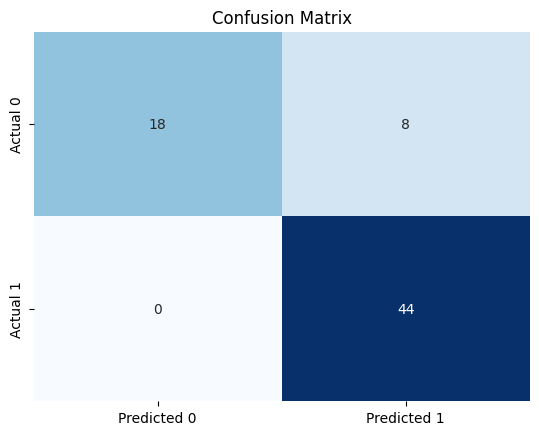

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

# Convert labels to binary::

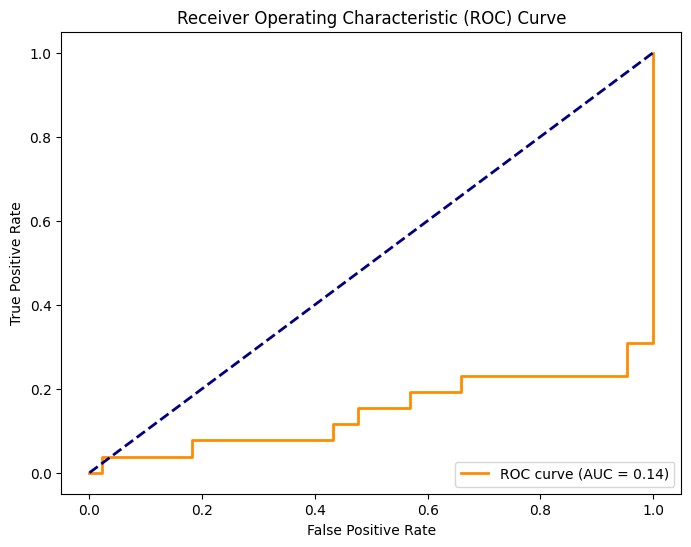

In [8]:
from sklearn.metrics import roc_curve, auc

#The roc_curve function in scikit-learn expects binary labels for the true class. Since your y_true takes values in{'b', 'g'}, you need to convert these labels to binary values (e.g., 0 and 1) or use the pos_label parameter explicitly. Here's how you can handle this:
# Assuming 'b' is the positive class and 'g' is the negative class
y_true_binary = np.where(y_test == 'b', 1, 0)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true_binary, svm_classifier.decision_function(X_test_scaled))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# rbf Kernel:

Accuracy: 0.90

Confusion Matrix:
[[20  6]
 [ 1 43]]

Classification Report:
              precision    recall  f1-score   support

           b       0.95      0.77      0.85        26
           g       0.88      0.98      0.92        44

    accuracy                           0.90        70
   macro avg       0.91      0.87      0.89        70
weighted avg       0.91      0.90      0.90        70



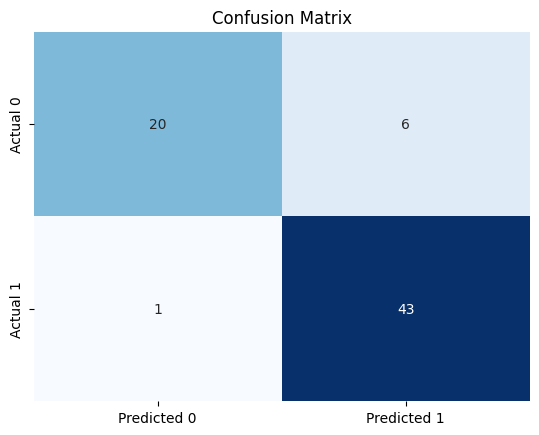

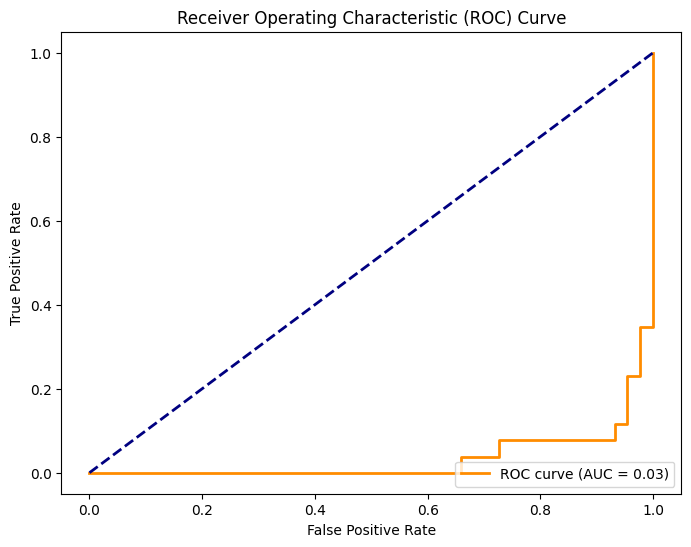

In [15]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your binary classification dataset (replace 'your_dataset.csv' with your file)
# Example assuming your dataset is in a CSV file:
# Specify the path to your CSV file or provide the appropriate file path
file_path = 'ionosphere.data'
dataset = pd.read_csv(file_path)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import roc_curve, auc

#The roc_curve function in scikit-learn expects binary labels for the true class. Since your y_true takes values in{'b', 'g'}, you need to convert these labels to binary values (e.g., 0 and 1) or use the pos_label parameter explicitly. Here's how you can handle this:
# Assuming 'b' is the positive class and 'g' is the negative class
y_true_binary = np.where(y_test == 'b', 1, 0)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true_binary, svm_classifier.decision_function(X_test_scaled))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# poly Kernel:

Accuracy: 0.70

Confusion Matrix:
[[ 5 21]
 [ 0 44]]

Classification Report:
              precision    recall  f1-score   support

           b       1.00      0.19      0.32        26
           g       0.68      1.00      0.81        44

    accuracy                           0.70        70
   macro avg       0.84      0.60      0.56        70
weighted avg       0.80      0.70      0.63        70



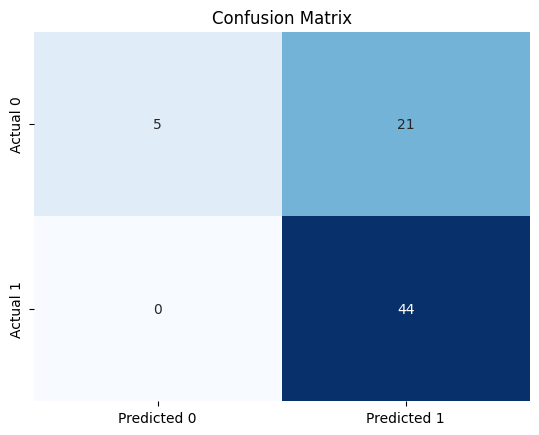

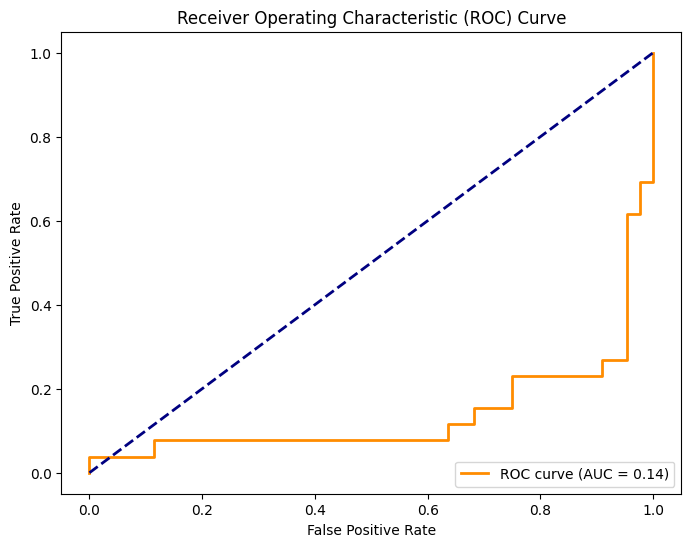

In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your binary classification dataset (replace 'your_dataset.csv' with your file)
# Example assuming your dataset is in a CSV file:
# Specify the path to your CSV file or provide the appropriate file path
file_path = 'ionosphere.data'
dataset = pd.read_csv(file_path)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1.0, random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import roc_curve, auc

#The roc_curve function in scikit-learn expects binary labels for the true class. Since your y_true takes values in{'b', 'g'}, you need to convert these labels to binary values (e.g., 0 and 1) or use the pos_label parameter explicitly. Here's how you can handle this:
# Assuming 'b' is the positive class and 'g' is the negative class
y_true_binary = np.where(y_test == 'b', 1, 0)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true_binary, svm_classifier.decision_function(X_test_scaled))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Sigmoid Kernel:

Accuracy: 0.83

Confusion Matrix:
[[16 10]
 [ 2 42]]

Classification Report:
              precision    recall  f1-score   support

           b       0.89      0.62      0.73        26
           g       0.81      0.95      0.88        44

    accuracy                           0.83        70
   macro avg       0.85      0.78      0.80        70
weighted avg       0.84      0.83      0.82        70



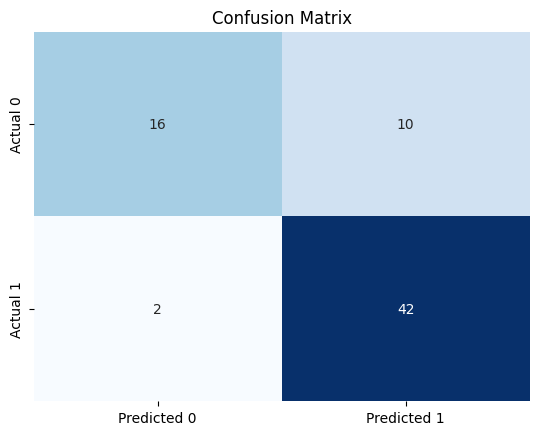

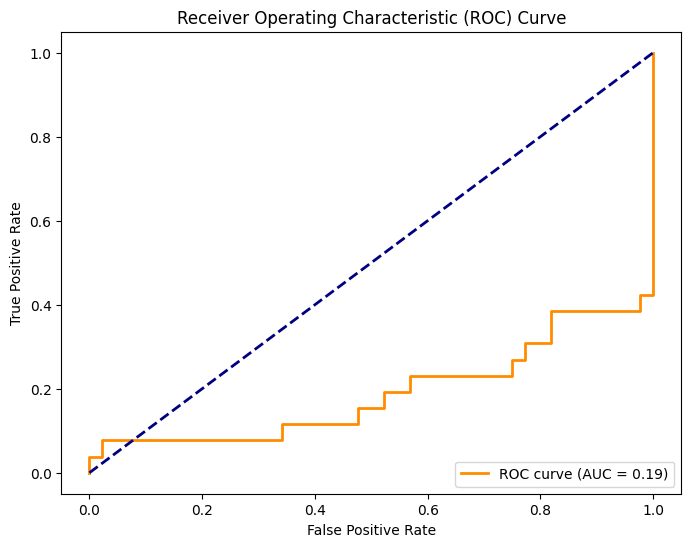

In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your binary classification dataset (replace 'your_dataset.csv' with your file)
# Example assuming your dataset is in a CSV file:
# Specify the path to your CSV file or provide the appropriate file path
file_path = 'ionosphere.data'
dataset = pd.read_csv(file_path)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM classifier
svm_classifier = SVC(kernel='sigmoid', C=1.0, random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import roc_curve, auc

#The roc_curve function in scikit-learn expects binary labels for the true class. Since your y_true takes values in{'b', 'g'}, you need to convert these labels to binary values (e.g., 0 and 1) or use the pos_label parameter explicitly. Here's how you can handle this:
# Assuming 'b' is the positive class and 'g' is the negative class
y_true_binary = np.where(y_test == 'b', 1, 0)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true_binary, svm_classifier.decision_function(X_test_scaled))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()